# Final Project
Natalie Rodriguez BIOS512

**Due date: 06-December-2024**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

In [1]:
library("tidyverse")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [18]:
starbucks <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2021/2021-12-21/starbucks.csv')
sb = starbucks |> filter(size %in% c("tall", "grande", "venti"))
#sb |> head()

Rows: 1147 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): product_name, size, trans_fat_g, fiber_g
dbl (11): milk, whip, serv_size_m_l, calories, total_fat_g, saturated_fat_g,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


I am interested in the Official Starbucks Nutritional dataset from the pdf Starbucks Coffee Company Beverage Nutrition Information 2021 found in Tidytuesday.

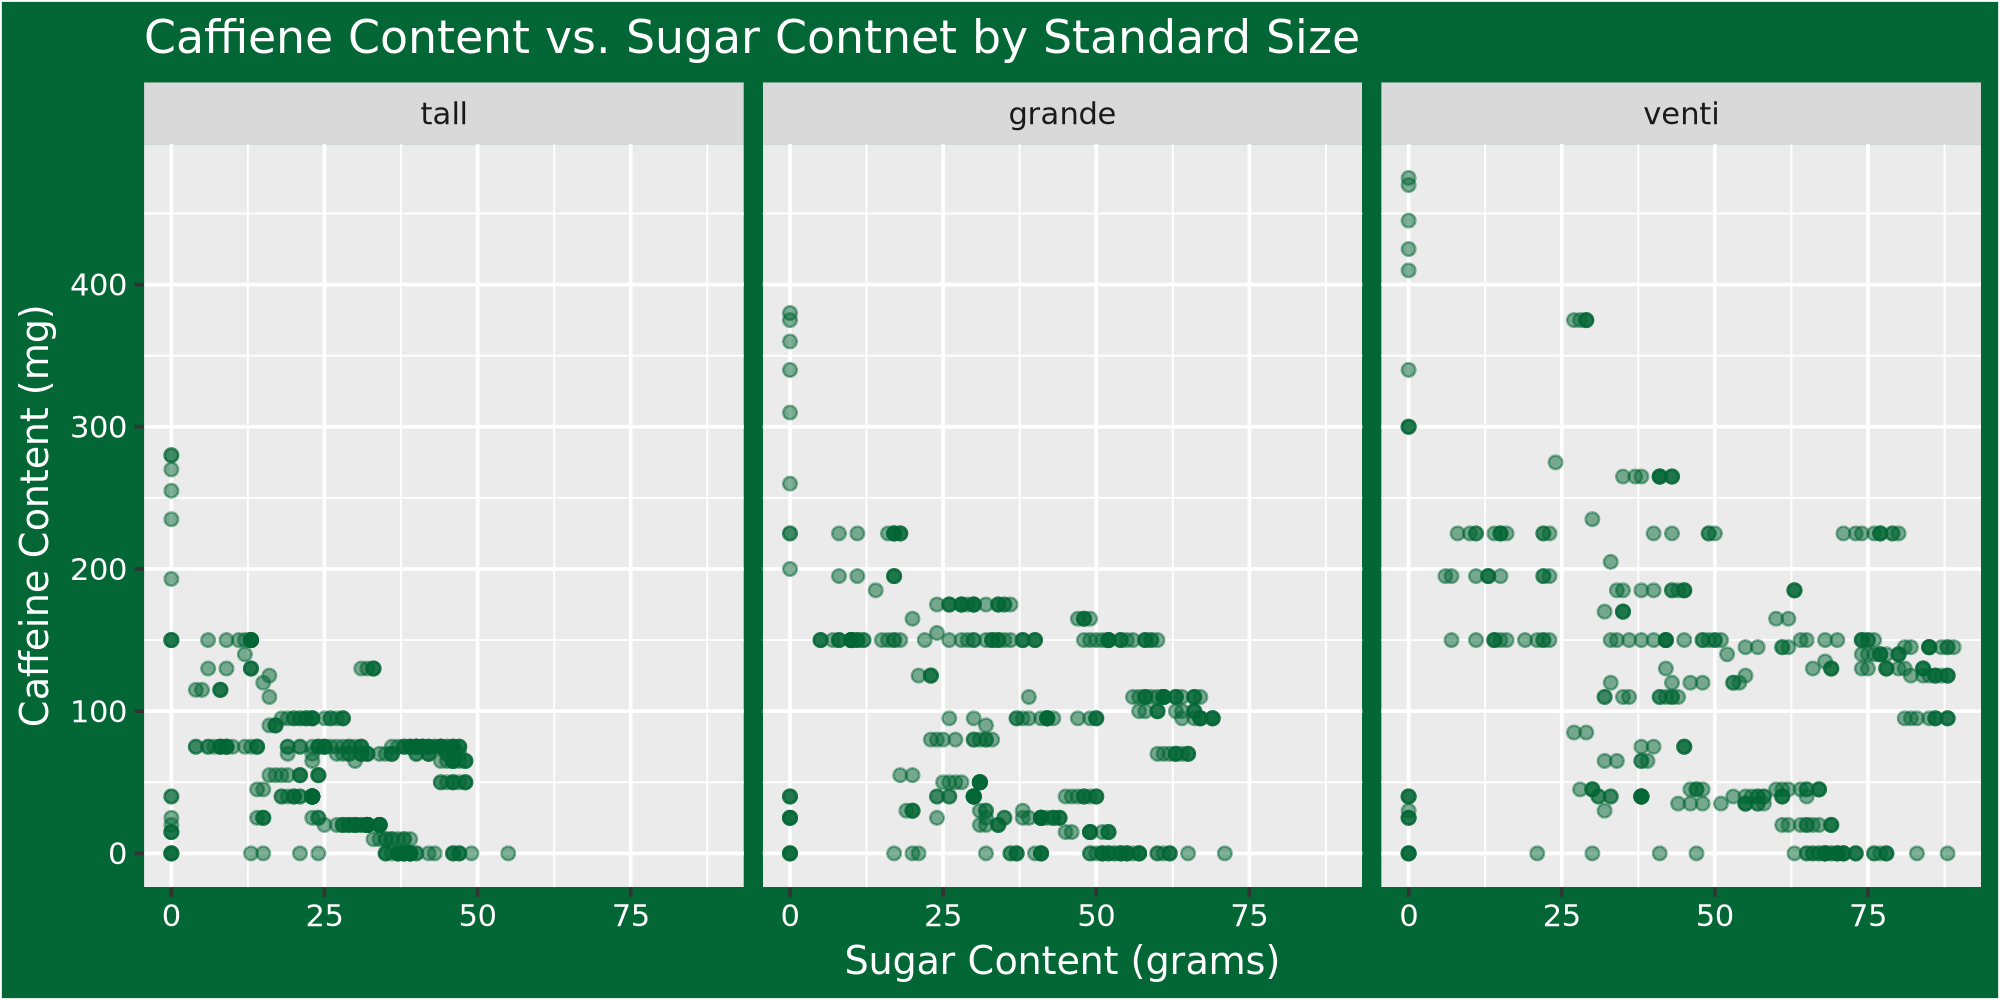

In [19]:
options(repr.plot.width = 8, repr.plot.height = 4)

sb |> mutate(size = fct_reorder(size, caffeine_mg)) |>
ggplot(aes(x=sugar_g, y=caffeine_mg)) + geom_point(color="#036635", alpha=0.5) +
    facet_wrap(~size) + 
    theme(plot.background = element_rect(fill = "#036635"), 
            text = element_text(color = "White"), 
            axis.text=element_text(color="White") )+ 
    labs(
        title = "Caffiene Content vs. Sugar Contnet by Standard Size",
        x="Sugar Content (grams)", 
        y="Caffeine Content (mg)")

I want to examine sugar content and caffeine content of Starbucks Drinks. 
I plotted caffiene content vs. sugar content in a scatter plot to see the if any pattern exists, and faceted the graphs
according to the size of the drinks. 
It appears that the drinks with higher sugar content seem to have lower caffeine content for each size. 
Accross all sizes, the drinks with the highest amount of caffeine (250mg +) have 0 grams of sugar. I am interested 
in determining which drinks these are, and if they are the same across all sizes. I would guess they are brewed cups
of normal roasts, but they could be espresso based. 
I will also examine the drinks with the highest sugar content, which I imagine will be more geared towards holiday
drinks or children's pallets (frappaccinos, hot chocolate, etc.). 

In [20]:
caf_sb <- sb %>% filter(caffeine_mg>=200) %>%
    group_by(size) %>%
    summarise(caf=sum(caffeine_mg>=200, na.rm=TRUE))
#caf_sb |> head()

In [21]:
sug_sb <- sb %>% filter(sugar_g>50) %>%
    group_by(size) %>%
    summarise(sug=sum(sugar_g>=65, na.rm=TRUE))
#sug_sb |> head()

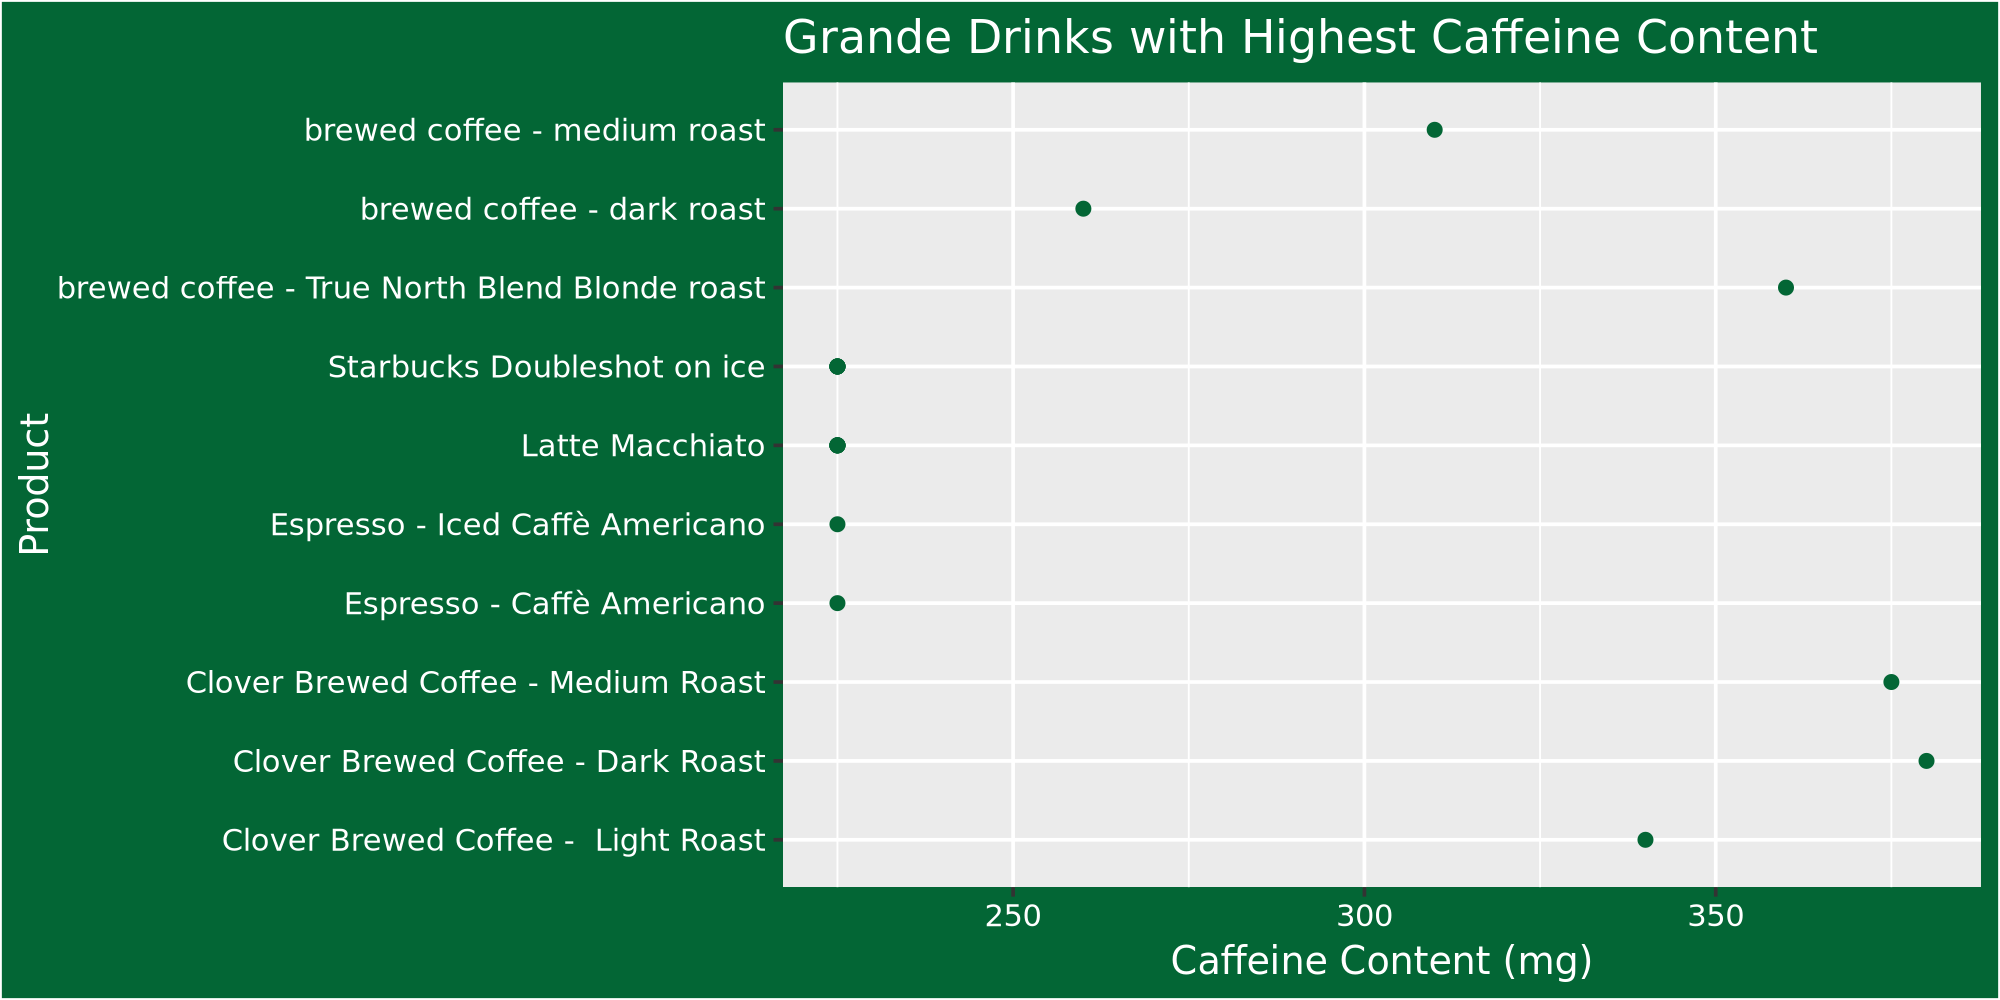

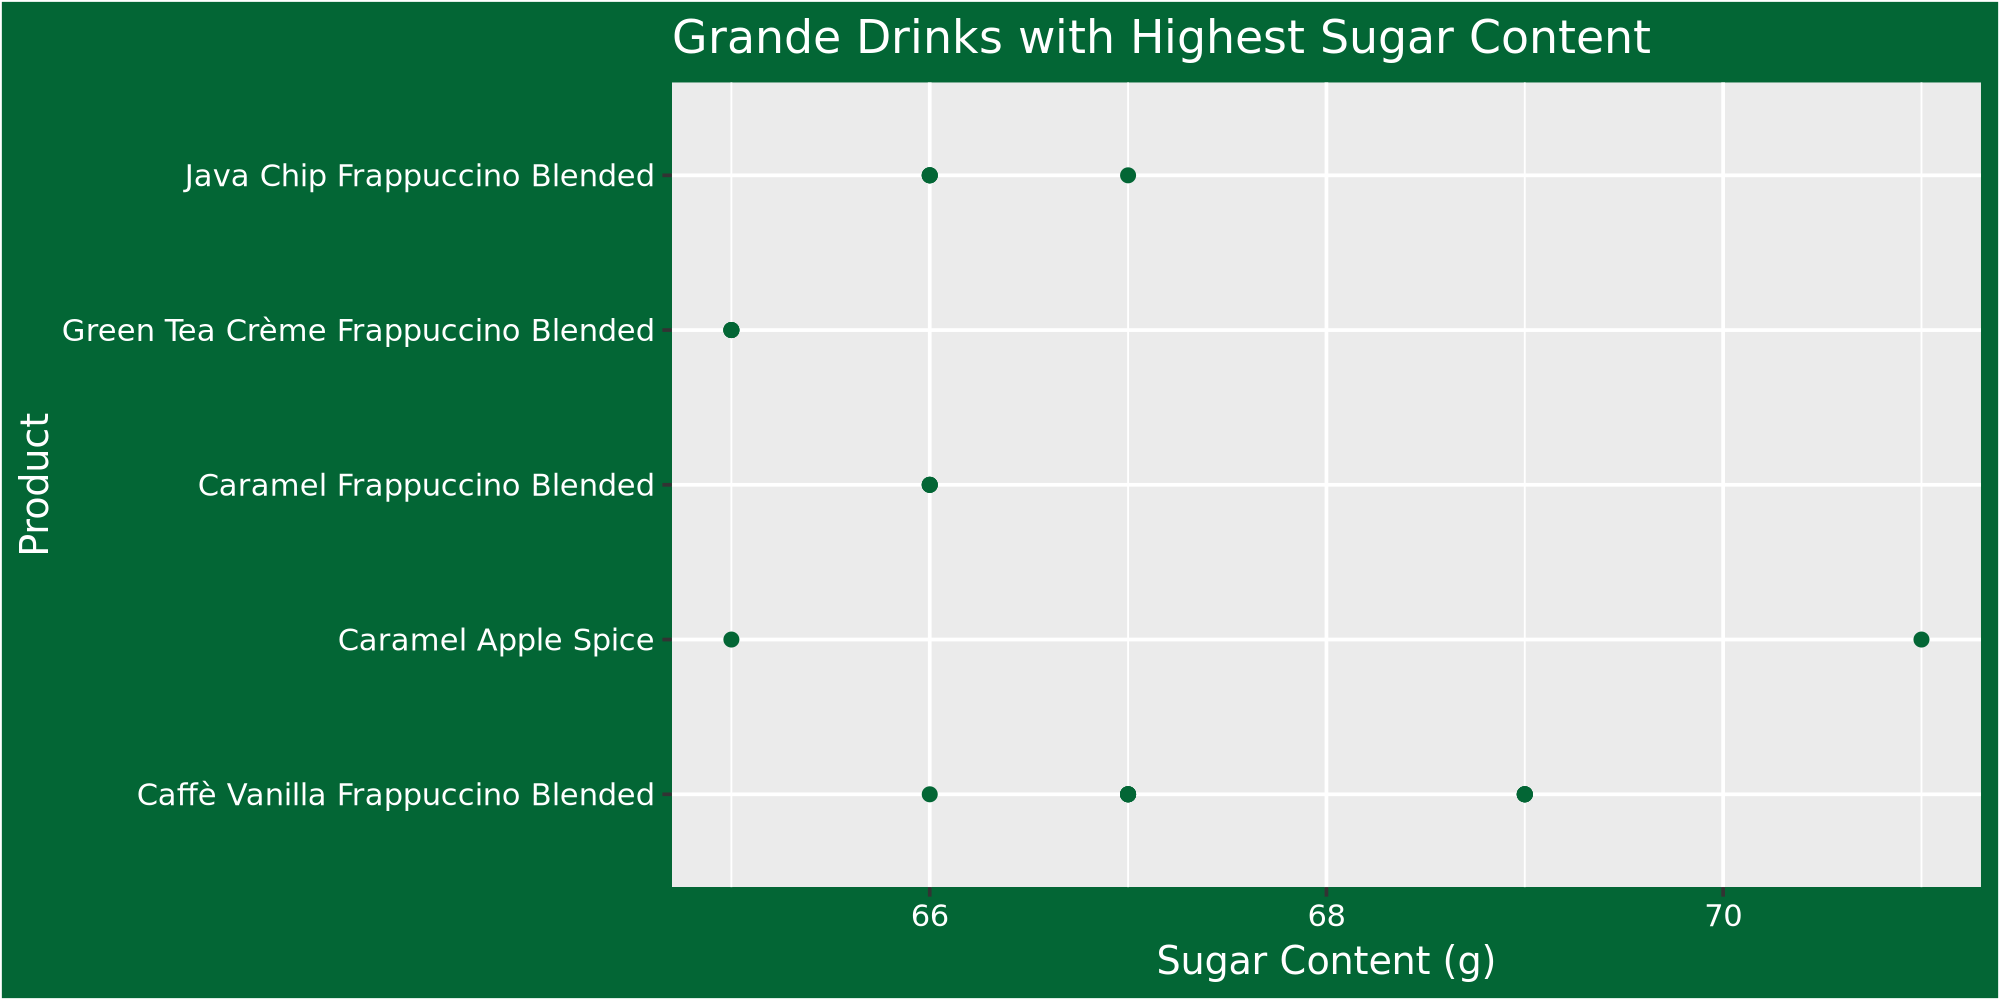

In [22]:
sb |>
    filter(caffeine_mg>=200, size=="grande") |>
    select(caffeine_mg, product_name) |>
    arrange(desc(caffeine_mg)) |>
    top_n(10, caffeine_mg)|>
    ggplot(aes(y=product_name, x=caffeine_mg)) + geom_point(color="#036635") + 
    theme(plot.background = element_rect(fill = "#036635"), 
            text = element_text(color = "White"), 
            axis.text=element_text(color="White") )+ 
    labs(
        title = "Grande Drinks with Highest Caffeine Content",
        x="Caffeine Content (mg)", 
        y="Product")

sb |>
    filter(sugar_g>=60, size=="grande") |>
    select(sugar_g, product_name) |>
    arrange(desc(sugar_g)) |>
    top_n(20, sugar_g)|>
    ggplot(aes(y=product_name, x=sugar_g)) + geom_point(color="#036635") + 
    theme(plot.background = element_rect(fill = "#036635"), 
            text = element_text(color = "White"), 
            axis.text=element_text(color="White") )+ 
    labs(
        title = "Grande Drinks with Highest Sugar Content",
        x="Sugar Content (g)", 
        y="Product")

I decided to look only at Grande sized drinks since they are common defaults in the stores, and the same patterns seemed to follow across all sizes. I sorted the dataset by descending order, and kept the top values from each sort.
Not suprisingly, the top 10 most caffeinated drinks on the menu are brewed coffees and espresso based dirnks without milk (with the exception of the macchiato). The drinks with the highest sugar content aredefinitely geared towards people who don't want to sip on pure coffee, and most of them are frappuccinos. The grande drinks have up to 75g of sugar. The American Heart Association recommends women do not exceed 25g of added sugar per day, and men do not exceed 36g of added sugar per day (https://www.heart.org/en/healthy-living/healthy-eating/eat-smart/sugar/how-much-sugar-is-too-much). It may be a good thing that the most caffeinated drinks are not also the drinks which contain the most sugar.

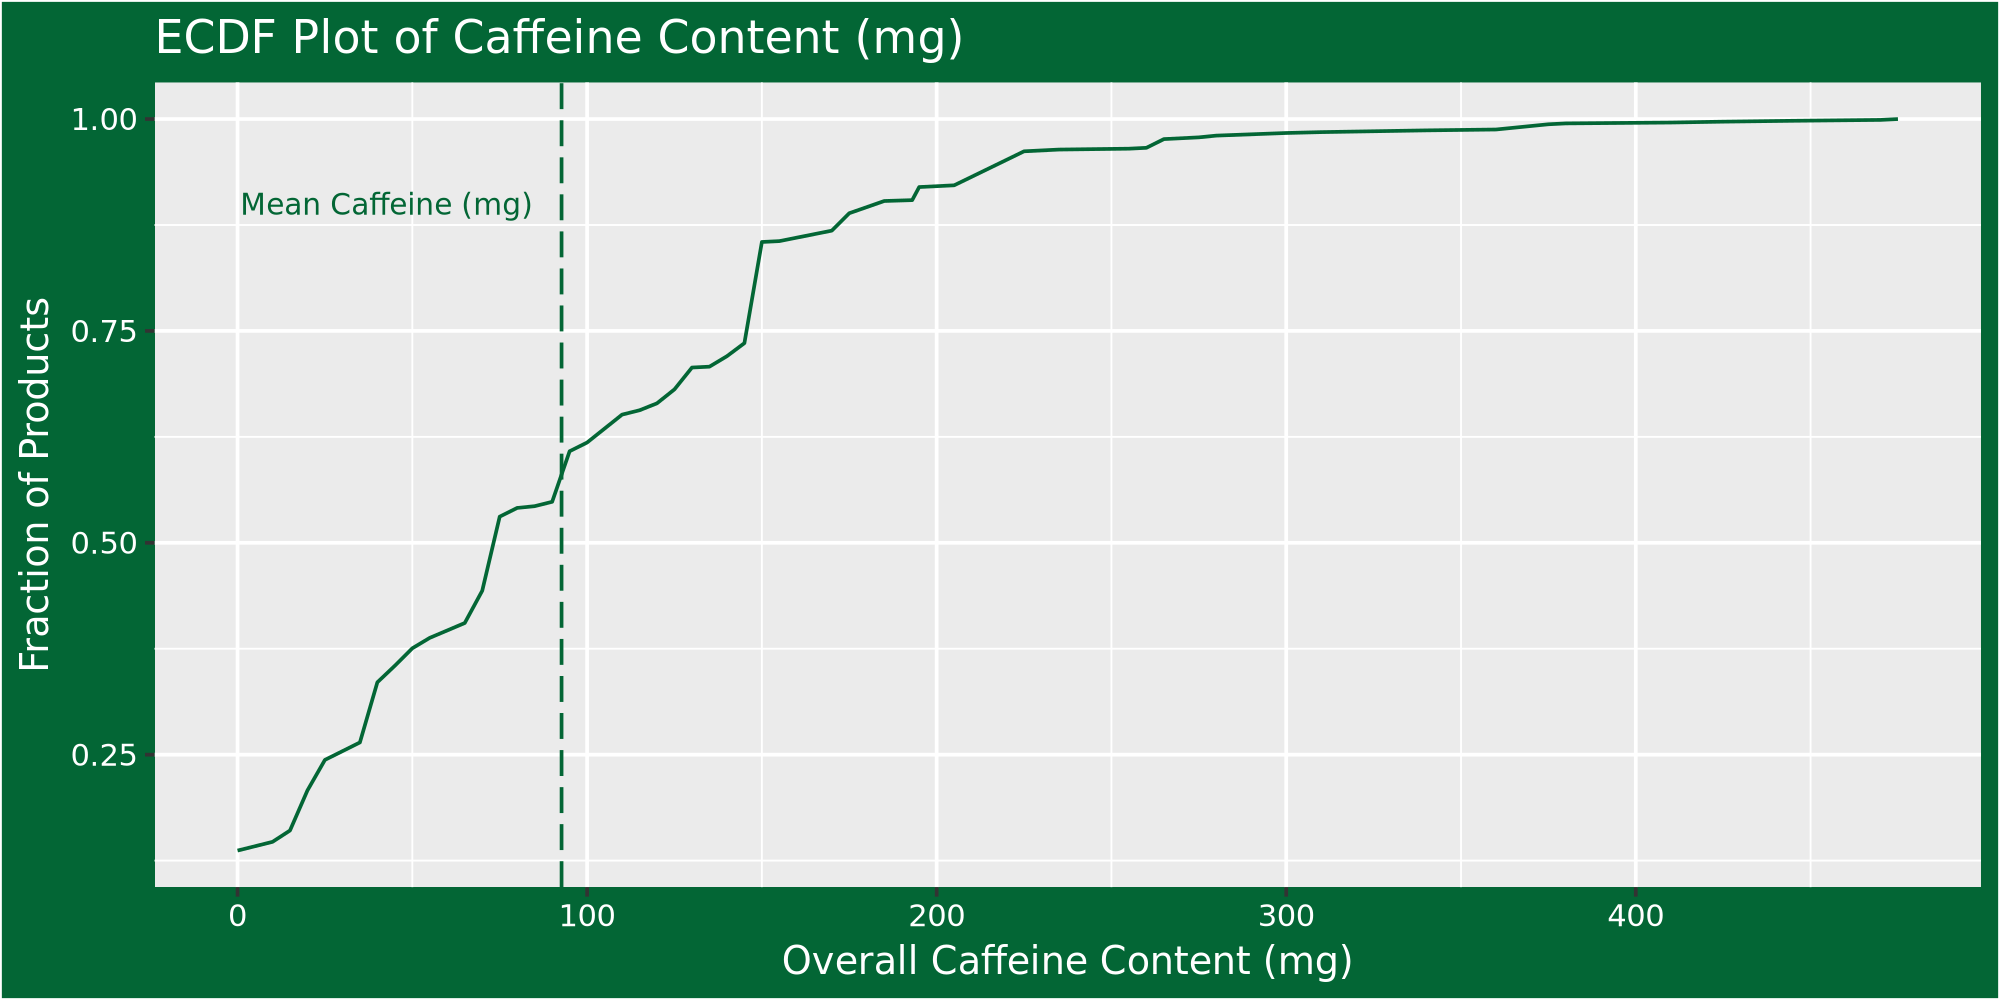

In [23]:
ecdf <- sb %>% mutate(cum_caf = cume_dist(caffeine_mg))
mean_caf=mean(sb$caffeine_mg)

ggplot(ecdf, aes(x=caffeine_mg, y=cum_caf)) + geom_line(color="#036635") + 
    labs(title= "ECDF Plot of Caffeine Content (mg)", 
         x = "Overall Caffeine Content (mg)",  
         y= "Fraction of Products") +
    theme(
    panel.grid.major = element_line(color = "white"),
    plot.background = element_rect(fill = "#036635"),
    text = element_text(color = "White"), 
    axis.text=element_text(color="White")) +
    geom_vline(xintercept = mean(sb$caffeine_mg), linetype=5, color="#036635") +
    annotate("text", size=3, x=mean_caf-50, y=0.9, label="Mean Caffeine (mg)", angle=0, color="#036635") 


I used an empirical cumulative distribution function (ECDF) plot to examine the data points of caffeine content from lowest to highest against their percentiles. The mean caffeine amount across all menu drinks is represented by the dashed line and is just under 100mg. It appears that over 50% of drinks have caffiene content below or at the average, and less than 15% of drinks have caffiene content over 200mg. The Mayo Clinic recommends adults consume under 400mg of caffeine a day, which an overwhelming number of drinks are under this amount (https://www.mayoclinic.org/healthy-lifestyle/nutrition-and-healthy-eating/in-depth/caffeine/art-20045678). 
If consumers of starbucks drinks are trying to be health conscious, they should look into the sugar content of their drinks. 